<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/Multiclass_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Aug  3 09:43:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d alessiocorrado99/animals10

100% 583M/586M [00:15<00:00, 40.3MB/s]
100% 586M/586M [00:15<00:00, 39.2MB/s]


In [ ]:
!unzip /content/animals10.zip

In [9]:
for dirpath, dirnames, filenames in os.walk("/content/raw-img"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in '/content/raw-img'.
There are 0 directories and 1446 images in '/content/raw-img/elefante'.
There are 0 directories and 1866 images in '/content/raw-img/mucca'.
There are 0 directories and 4863 images in '/content/raw-img/cane'.
There are 0 directories and 4821 images in '/content/raw-img/ragno'.
There are 0 directories and 3098 images in '/content/raw-img/gallina'.
There are 0 directories and 1820 images in '/content/raw-img/pecora'.
There are 0 directories and 1668 images in '/content/raw-img/gatto'.
There are 0 directories and 2112 images in '/content/raw-img/farfalla'.
There are 0 directories and 1862 images in '/content/raw-img/scoiattolo'.
There are 0 directories and 2623 images in '/content/raw-img/cavallo'.


In [10]:
!mkdir Animal10_dataset

In [11]:
cd Animal10_dataset

/content/Animal10_dataset


In [12]:
pwd

'/content/Animal10_dataset'

In [13]:
!mkdir train
!mkdir test

In [14]:
cd train

/content/Animal10_dataset/train


In [15]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


In [16]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [17]:
cd /content/Animal10_dataset/test

/content/Animal10_dataset/test


In [18]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [19]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(('.jpg','.jpeg','.png'))]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)

In [20]:
source_folder_cane = "/content/raw-img/cane"
source_folder_cavallo = "/content/raw-img/cavallo"
source_folder_elefante = "/content/raw-img/elefante"
source_folder_farfalla = '/content/raw-img/farfalla'
source_folder_gallina = "/content/raw-img/gallina"
source_folder_gatto = "/content/raw-img/gatto"
source_folder_mucca = "/content/raw-img/mucca"
source_folder_pecora = "/content/raw-img/pecora"
source_folder_scoiattolo = "/content/raw-img/scoiattolo"
source_folder_ragno = "/content/raw-img/ragno"

In [21]:
split_data(source_folder_cane,"/content/Animal10_dataset/train/cane-dog","/content/Animal10_dataset/test/cane-dog")
split_data(source_folder_cavallo,"/content/Animal10_dataset/train/cavallo-horse","/content/Animal10_dataset/test/cavallo-horse")
split_data(source_folder_elefante,"/content/Animal10_dataset/train/elefante-elephant","/content/Animal10_dataset/test/elefante-elephant")
split_data(source_folder_farfalla,"/content/Animal10_dataset/train/farfalla-butterfly","/content/Animal10_dataset/test/farfalla-butterfly")
split_data(source_folder_gallina,"/content/Animal10_dataset/train/gallina-chicken","/content/Animal10_dataset/test/gallina-chicken")
split_data(source_folder_gatto,"/content/Animal10_dataset/train/gatto-cat","/content/Animal10_dataset/test/gatto-cat")
split_data(source_folder_mucca,"/content/Animal10_dataset/train/mucca-cow","/content/Animal10_dataset/test/mucca-cow")
split_data(source_folder_pecora,"/content/Animal10_dataset/train/pecora-sheep","/content/Animal10_dataset/test/pecora-sheep")
split_data(source_folder_scoiattolo,"/content/Animal10_dataset/train/scoiattolo-squirrel","/content/Animal10_dataset/test/scoiattolo-squirrel")
split_data(source_folder_ragno,"/content/Animal10_dataset/train/ragno-spider","/content/Animal10_dataset/test/ragno-spider")

In [22]:
for dirpath, dirnames, filenames in os.walk("/content/Animal10_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/Animal10_dataset'.
There are 10 directories and 0 images in '/content/Animal10_dataset/test'.
There are 0 directories and 620 images in '/content/Animal10_dataset/test/gallina-chicken'.
There are 0 directories and 973 images in '/content/Animal10_dataset/test/cane-dog'.
There are 0 directories and 334 images in '/content/Animal10_dataset/test/gatto-cat'.
There are 0 directories and 965 images in '/content/Animal10_dataset/test/ragno-spider'.
There are 0 directories and 525 images in '/content/Animal10_dataset/test/cavallo-horse'.
There are 0 directories and 290 images in '/content/Animal10_dataset/test/elefante-elephant'.
There are 0 directories and 364 images in '/content/Animal10_dataset/test/pecora-sheep'.
There are 0 directories and 373 images in '/content/Animal10_dataset/test/scoiattolo-squirrel'.
There are 0 directories and 374 images in '/content/Animal10_dataset/test/mucca-cow'.
There are 0 directories and 423 images in '/conte

In [23]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Animal10_dataset/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cane-dog' 'cavallo-horse' 'elefante-elephant' 'farfalla-butterfly'
 'gallina-chicken' 'gatto-cat' 'mucca-cow' 'pecora-sheep' 'ragno-spider'
 'scoiattolo-squirrel']


In [24]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(199, 300, 3)


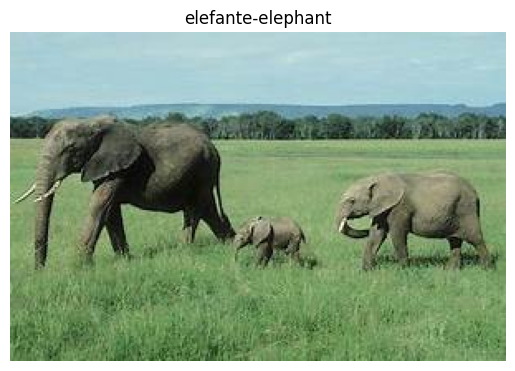

In [26]:
img = view_random_image(target_dir = '/content/Animal10_dataset/test/',
                        target_class = "elefante-elephant")


In [27]:
# define training and testing directory paths

train_dir = '/content/Animal10_dataset/train'
test_dir = '/content/Animal10_dataset/test'

In [28]:

# rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 20,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)

# without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)


# test instances without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [29]:
# Augment the data

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical',
                                                                  shuffle = True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 20938 images belonging to 10 classes.
Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


(-0.5, 223.5, 223.5, -0.5)

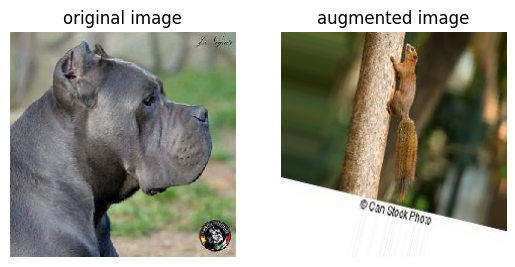

In [32]:

# visualize the data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


# random_number = random.randint(0, 32)

plt.figure()
plt.subplot(1,2,1)

plt.imshow(images[12])
plt.title('original image')
plt.axis(False)



plt.subplot(1,2,2)
plt.imshow(augmented_images[12])
plt.title('augmented image')
plt.axis(False)

In [ ]:
# helper function
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))




  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)


  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# Model 0: baseline model with Data Augmentation

In [33]:
train_data_augmented.num_classes

10

In [34]:
# build a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [35]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [36]:
history_0 = model_0.fit(train_data_augmented,
                        epochs = 6,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
655/655 [==============================] - 281s 412ms/step - loss: 1.9756 - accuracy: 0.2976 - val_loss: 1.7357 - val_accuracy: 0.4085
Epoch 2/6
655/655 [==============================] - 274s 419ms/step - loss: 1.7406 - accuracy: 0.3965 - val_loss: 1.5287 - val_accuracy: 0.4761
Epoch 3/6
655/655 [==============================] - 264s 404ms/step - loss: 1.6484 - accuracy: 0.4325 - val_loss: 1.6327 - val_accuracy: 0.4574
Epoch 4/6
655/655 [==============================] - 269s 410ms/step - loss: 1.6035 - accuracy: 0.4504 - val_loss: 1.4562 - val_accuracy: 0.4990
Epoch 5/6
655/655 [==============================] - 266s 406ms/step - loss: 1.5818 - accuracy: 0.4572 - val_loss: 1.4938 - val_accuracy: 0.4990
Epoch 6/6
655/655 [==============================] - 260s 398ms/step - loss: 1.5509 - accuracy: 0.4626 - val_loss: 1.5024 - val_accuracy: 0.4883


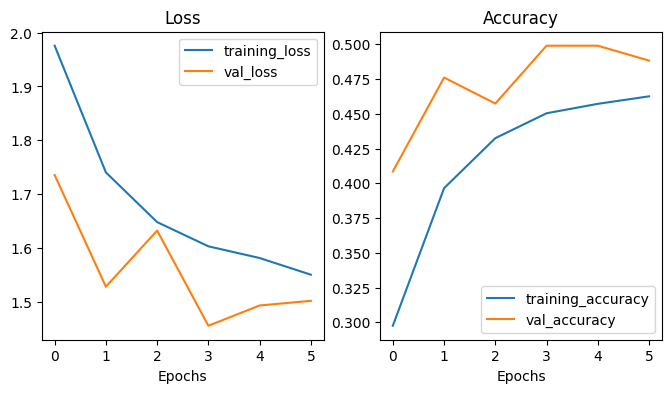

In [71]:
curve_0 = plot_loss_curves(history_0)
curve_0

# model 1: hyperparameter tuning

In [40]:
# build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [41]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [42]:
history_1 = model_1.fit(train_data_augmented,
                        epochs = 6,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
655/655 [==============================] - 281s 423ms/step - loss: 2.0831 - accuracy: 0.2513 - val_loss: 1.7979 - val_accuracy: 0.4100
Epoch 2/6
655/655 [==============================] - 277s 423ms/step - loss: 1.7746 - accuracy: 0.3744 - val_loss: 1.5626 - val_accuracy: 0.4545
Epoch 3/6
655/655 [==============================] - 278s 425ms/step - loss: 1.6516 - accuracy: 0.4176 - val_loss: 1.4722 - val_accuracy: 0.4799
Epoch 4/6
655/655 [==============================] - 276s 422ms/step - loss: 1.5587 - accuracy: 0.4521 - val_loss: 1.4123 - val_accuracy: 0.4988
Epoch 5/6
655/655 [==============================] - 276s 421ms/step - loss: 1.4743 - accuracy: 0.4874 - val_loss: 1.2935 - val_accuracy: 0.5512
Epoch 6/6
655/655 [==============================] - 276s 421ms/step - loss: 1.4169 - accuracy: 0.5091 - val_loss: 1.2594 - val_accuracy: 0.5589


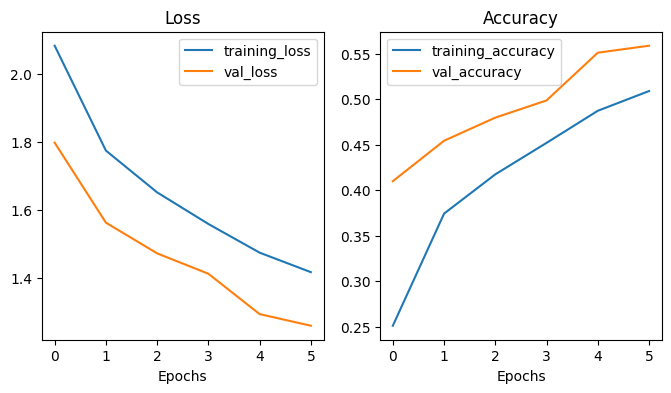

In [72]:
curve_1 = plot_loss_curves(history_1)
curve_1

from now we will use two models from tensorflow Hub:
1. ResNetV2 - a state of the art computer vision model architecture from 2016.
https://arxiv.org/abs/1603.05027
2. EfficientNet - a state of the art computer vision architecture from 2019.
https://arxiv.org/abs/1603.05027


# model 2: Resnet V2

In [45]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [46]:
# resnet 50 v2 url
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [47]:
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = True,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [48]:
resnet_model = create_model(resnet_url)

# compile a model
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [49]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 23,539,850
Non-trainable params: 45,440
_________________________________________________________________


In [50]:
# fit the model
resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs = 7,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_steps=len(test_data),
                                  validation_data = test_data)

Epoch 1/7
655/655 [==============================] - 395s 544ms/step - loss: 1.3505 - accuracy: 0.6707 - val_loss: 1.7770 - val_accuracy: 0.6464
Epoch 2/7
655/655 [==============================] - 349s 532ms/step - loss: 1.0945 - accuracy: 0.7780 - val_loss: 1.7338 - val_accuracy: 0.6405
Epoch 3/7
655/655 [==============================] - 340s 520ms/step - loss: 1.0396 - accuracy: 0.8108 - val_loss: 1.4089 - val_accuracy: 0.7146
Epoch 4/7
655/655 [==============================] - 340s 519ms/step - loss: 1.0390 - accuracy: 0.8237 - val_loss: 1.3798 - val_accuracy: 0.7474
Epoch 5/7
655/655 [==============================] - 336s 513ms/step - loss: 1.0254 - accuracy: 0.8400 - val_loss: 1.3995 - val_accuracy: 0.7520
Epoch 6/7
655/655 [==============================] - 334s 510ms/step - loss: 1.0432 - accuracy: 0.8413 - val_loss: 1.2206 - val_accuracy: 0.8086
Epoch 7/7
655/655 [==============================] - 337s 513ms/step - loss: 1.0534 - accuracy: 0.8438 - val_loss: 1.1499 - val_ac

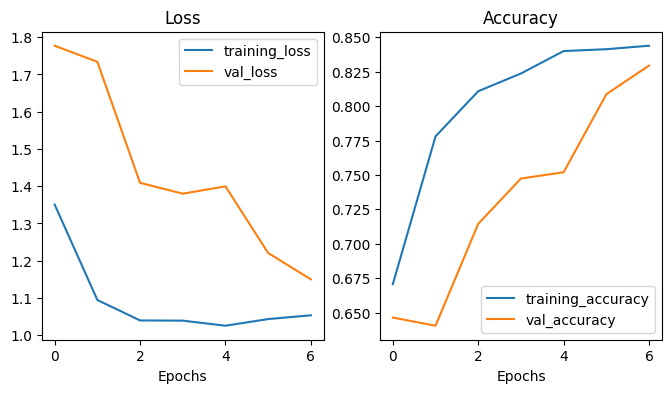

In [73]:
curve_resnet = plot_loss_curves(resnet_history)
curve_resnet

In [52]:
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# def make_prediction(image, model):
#   class_names = ['cane-dog','cavallo-horse','elefante-elephant','farfalla-butterfly','gallina-chicken', 'gatto-cat', 'mucca-cow' ,'pecora-sheep' ,'ragno-spider','scoiattolo-squirrel']

#   img = tf.io.read_file(image)

#   img = tf.image.decode_image(img, channels = 3)
#   img = tf.image.resize(img, [224,224])
#   img = img/255.

#   img_dim = tf.expand_dims(img, axis = 0)

#   x = preprocess_input(img_dim)

#   pred = model.predict(x)
#   decoded_preds = decode_predictions(pred, top = 3)[0]
#   return decoded_preds
#   # pred_class = tf.argmax(pred, axis = 1)

#   # pred_class = class_names[int(tf.round(pred)[0][0])]

#   # plt.imshow(img)

#   # plt.title(np.array(pred))
#   # plt.axis(False)
#   # print(type(pred))

In [53]:

# make_prediction('/content/pred_folder/ImageForPred05Cat.jpg', mobileNet_model_01)

In [54]:
# str([[1 2 3]])

# model 3: EfficientNet model

In [55]:
efficientNet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [56]:
# create the model

efficientNet_model = create_model(model_url = efficientNet_url, num_classes = 10)

efficientNet_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientNet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 4,020,358
Non-trainable params: 42,016
_________________________________________________________________


In [57]:
# fit the model

efficient_history = efficientNet_model.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 384s 500ms/step - loss: 0.5047 - accuracy: 0.8833 - val_loss: 0.4813 - val_accuracy: 0.8981
Epoch 2/6
655/655 [==============================] - 322s 492ms/step - loss: 0.3899 - accuracy: 0.9216 - val_loss: 0.4844 - val_accuracy: 0.9031
Epoch 3/6
655/655 [==============================] - 324s 495ms/step - loss: 0.3477 - accuracy: 0.9370 - val_loss: 0.3743 - val_accuracy: 0.9328
Epoch 4/6
655/655 [==============================] - 321s 491ms/step - loss: 0.3490 - accuracy: 0.9355 - val_loss: 0.4062 - val_accuracy: 0.9313
Epoch 5/6
655/655 [==============================] - 322s 492ms/step - loss: 0.3267 - accuracy: 0.9439 - val_loss: 0.4964 - val_accuracy: 0.9141
Epoch 6/6
655/655 [==============================] - 324s 494ms/step - loss: 0.3202 - accuracy: 0.9466 - val_loss: 0.5355 - val_accuracy: 0.8928


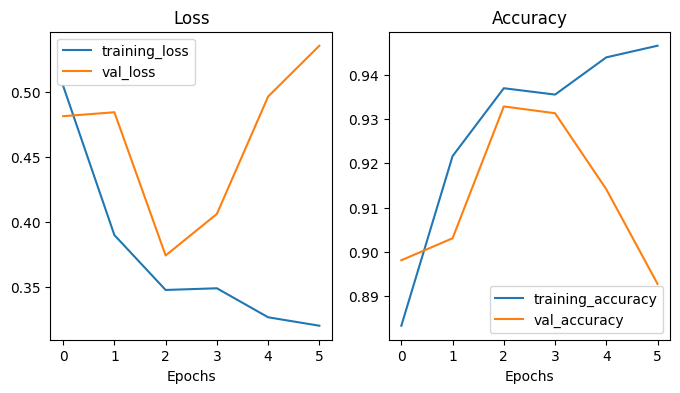

In [74]:
curve_efficient = plot_loss_curves(efficient_history)
curve_efficient

In [77]:
# # Try to get better model by setting trainable layers False
# def create_model(model_url, num_classes = 10):

#   feature_extractor_layer = hub.KerasLayer(model_url,
#                                            trainable = False,
#                                            name = 'feature_extraction_layer',
#                                            input_shape = (224,224,3))

#   model = tf.keras.Sequential([
#       feature_extractor_layer,
#       layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

#   ])

#   return model

# model 4: Mobilenet layers

In [61]:
mobileNet_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

In [62]:
# setting trainable layers to false
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = True,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [63]:
# create the model

mobileNet_model_01 = create_model(model_url = mobileNet_url, num_classes = 10)

mobileNet_model_01.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

mobileNet_model_01.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [64]:
# fit the model

mobileNet_history_01 = mobileNet_model_01.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 332s 457ms/step - loss: 0.6619 - accuracy: 0.8220 - val_loss: 0.6693 - val_accuracy: 0.8487
Epoch 2/6
655/655 [==============================] - 304s 464ms/step - loss: 0.5095 - accuracy: 0.8689 - val_loss: 0.8641 - val_accuracy: 0.8039
Epoch 3/6
655/655 [==============================] - 304s 464ms/step - loss: 0.4652 - accuracy: 0.8857 - val_loss: 0.6416 - val_accuracy: 0.8582
Epoch 4/6
655/655 [==============================] - 303s 462ms/step - loss: 0.4419 - accuracy: 0.8965 - val_loss: 1.1281 - val_accuracy: 0.7453
Epoch 5/6
655/655 [==============================] - 305s 466ms/step - loss: 0.4212 - accuracy: 0.9004 - val_loss: 0.5432 - val_accuracy: 0.8746
Epoch 6/6
655/655 [==============================] - 298s 454ms/step - loss: 0.4184 - accuracy: 0.9057 - val_loss: 0.4877 - val_accuracy: 0.8968


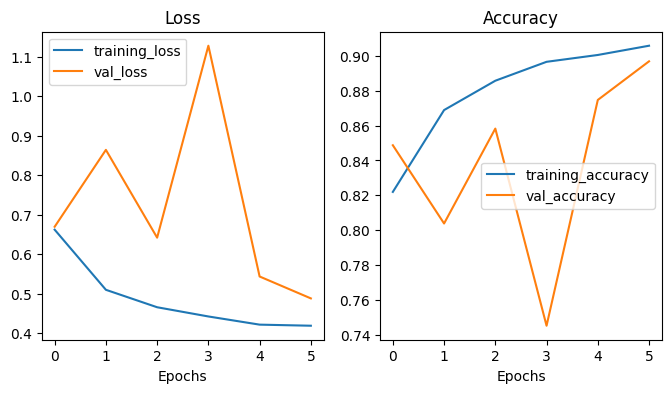

In [75]:
curve_mobilenet = plot_loss_curves(mobileNet_history_01)
curve_mobilenet

#model 5: efficientnet_v2_imagenet1k_b0

In [66]:
efficientnet_v2_imagenet1k_b0= "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [67]:
# setting trainable layers to false
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [68]:
# create the model

efficientnet_imagenet1k_b0_model = create_model(model_url = efficientnet_v2_imagenet1k_b0, num_classes = 10)

efficientnet_imagenet1k_b0_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientnet_imagenet1k_b0_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             5919312   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


In [69]:
# fit the model

efficientnet_imagenet_history = efficientnet_imagenet1k_b0_model.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 295s 437ms/step - loss: 0.3607 - accuracy: 0.9019 - val_loss: 0.1506 - val_accuracy: 0.9599
Epoch 2/6
655/655 [==============================] - 278s 425ms/step - loss: 0.1935 - accuracy: 0.9400 - val_loss: 0.1319 - val_accuracy: 0.9620
Epoch 3/6
655/655 [==============================] - 279s 427ms/step - loss: 0.1709 - accuracy: 0.9465 - val_loss: 0.1279 - val_accuracy: 0.9630
Epoch 4/6
655/655 [==============================] - 278s 425ms/step - loss: 0.1607 - accuracy: 0.9488 - val_loss: 0.1262 - val_accuracy: 0.9639
Epoch 5/6
655/655 [==============================] - 278s 424ms/step - loss: 0.1529 - accuracy: 0.9512 - val_loss: 0.1239 - val_accuracy: 0.9624
Epoch 6/6
655/655 [==============================] - 277s 423ms/step - loss: 0.1403 - accuracy: 0.9539 - val_loss: 0.1208 - val_accuracy: 0.9643


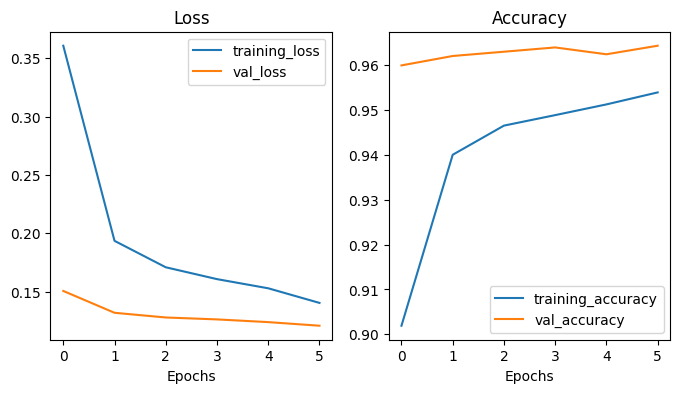

In [76]:
curve_efficient_imagenet=plot_loss_curves(efficientnet_imagenet_history)
curve_efficient_imagenet

## Make Predictions on unknown images

In [147]:
!pwd

/content/Animal10_dataset/test


In [148]:
cd /content/

/content


In [149]:
!mkdir test_folder

In [150]:
# add unknown images into test folder

In [198]:
def make_prediction(image, model):
  class_names = ['cane-dog','cavallo-horse','elefante-elephant','farfalla-butterfly','gallina-chicken', 'gatto-cat', 'mucca-cow' ,'pecora-sheep' ,'ragno-spider','scoiattolo-squirrel']

  img = tf.io.read_file(image)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, [224,224])
  img = img/255.

  img_dim = tf.expand_dims(img, axis = 0)
  pred = model.predict(img_dim)

  pred_class = tf.argmax(pred, axis = 1)
  # prediction = class_names[pred_class]
  prediction = class_names[pred_class[0].numpy()]
  # plt.title(np.array(pred))
  plt.imshow(img)
  plt.title(f"Predicted_class: {prediction}")

  plt.axis(False)

  # return prediction


1/1 [==============================] - 0s 18ms/step


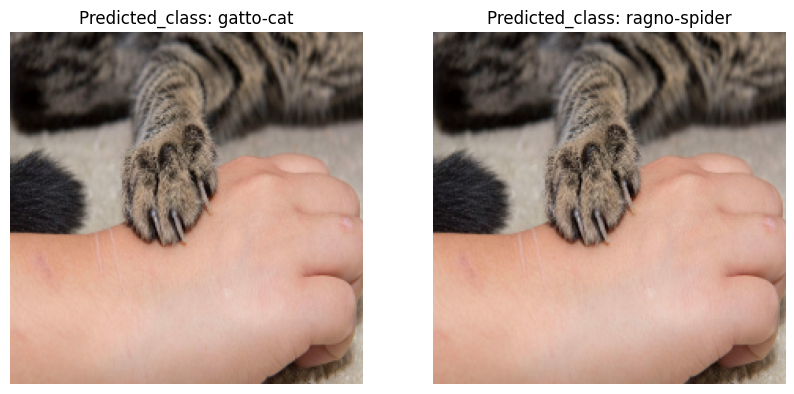

In [199]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
make_prediction("/content/test_folder/Scratch-YKL-092920-770x553-1-690x455.jpg",efficientnet_imagenet1k_b0_model)
plt.subplot(1,2,2)
make_prediction("/content/test_folder/Scratch-YKL-092920-770x553-1-690x455.jpg",model_0)

1/1 [==============================] - 0s 28ms/step


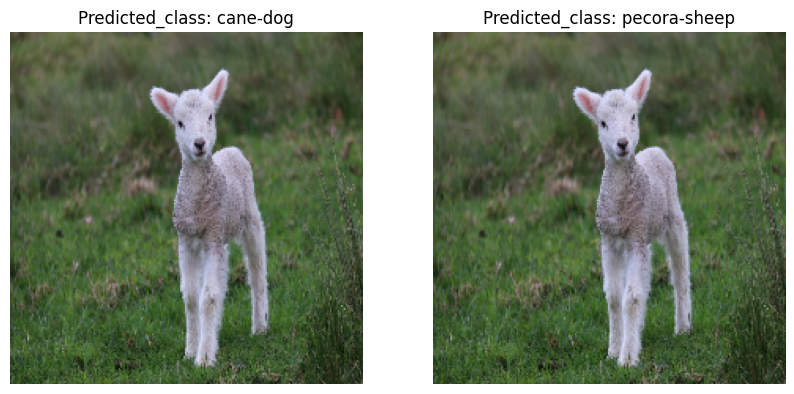

In [200]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
make_prediction("/content/test_folder/photo-1535979863199-3c77338429a0.jpg",model_1)
plt.subplot(1,2,2)
make_prediction("/content/test_folder/photo-1535979863199-3c77338429a0.jpg",efficientnet_imagenet1k_b0_model)

# model 5: Adding dropouts with hypertunning

In [ ]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Flatten(input_shape = ()))

In [ ]:
# build a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = tf.keras.layers.LeakyReLU(alpha = 0.3),
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    # tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # tf.keras.layers.MaxPool2D(),

    # tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = tf.keras.layers.LeakyReLU(alpha = 0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation = tf.keras.layers.LeakyReLU(alpha = 0.3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_5.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 1e-4),
                metrics = ['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 123210)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               12321100  
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                      

In [ ]:
history_5 = model_5.fit(train_data_augmented,
                        epochs = 6,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
655/655 [==============================] - 256s 388ms/step - loss: 2.5308 - accuracy: 0.2304 - val_loss: 1.9110 - val_accuracy: 0.3242
Epoch 2/6
655/655 [==============================] - 253s 387ms/step - loss: 2.0532 - accuracy: 0.2755 - val_loss: 1.8731 - val_accuracy: 0.3354
Epoch 3/6
655/655 [==============================] - 254s 387ms/step - loss: 2.0095 - accuracy: 0.2942 - val_loss: 1.8011 - val_accuracy: 0.3713
Epoch 4/6
655/655 [==============================] - 252s 385ms/step - loss: 1.9631 - accuracy: 0.3057 - val_loss: 1.7913 - val_accuracy: 0.3820
Epoch 5/6
655/655 [==============================] - 257s 392ms/step - loss: 1.9221 - accuracy: 0.3205 - val_loss: 1.8535 - val_accuracy: 0.3703
Epoch 6/6
655/655 [==============================] - 252s 385ms/step - loss: 1.9062 - accuracy: 0.3317 - val_loss: 1.7856 - val_accuracy: 0.3877


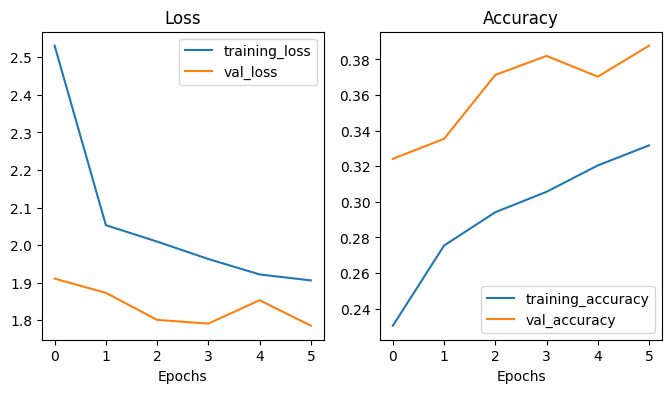

In [ ]:
plot_loss_curves(history_5)